### Finding Blatant Outliers in Data

### Installing and importing relavent modules

In [14]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

### Import data set and get basic statistics

In [4]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [5]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [6]:
training_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0
16999,-124.3,40.5,52.0,1820.0,300.0,806.0,270.0,3.0,94600.0


In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
training_df.mean()

longitude              -119.6
latitude                 35.6
housing_median_age       28.6
total_rooms            2643.7
total_bedrooms          539.4
population             1429.6
households              501.2
median_income             3.9
median_house_value   207300.9
dtype: float64

In [9]:
training_df.median()

longitude              -118.5
latitude                 34.2
housing_median_age       29.0
total_rooms            2127.0
total_bedrooms          434.0
population             1167.0
households              409.0
median_income             3.5
median_house_value   180400.0
dtype: float64

In [11]:
print("""The following columns might contain outliers:

  * total_rooms
  * total_bedrooms
  * population
  * households
  * possibly, median_income

In all of those columns:

  * the standard deviation is almost as high as the mean
  * the delta between 75% and max is much higher than the
      delta between min and 25%.""")

The following columns might contain outliers:

  * total_rooms
  * total_bedrooms
  * population
  * households
  * possibly, median_income

In all of those columns:

  * the standard deviation is almost as high as the mean
  * the delta between 75% and max is much higher than the
      delta between min and 25%.


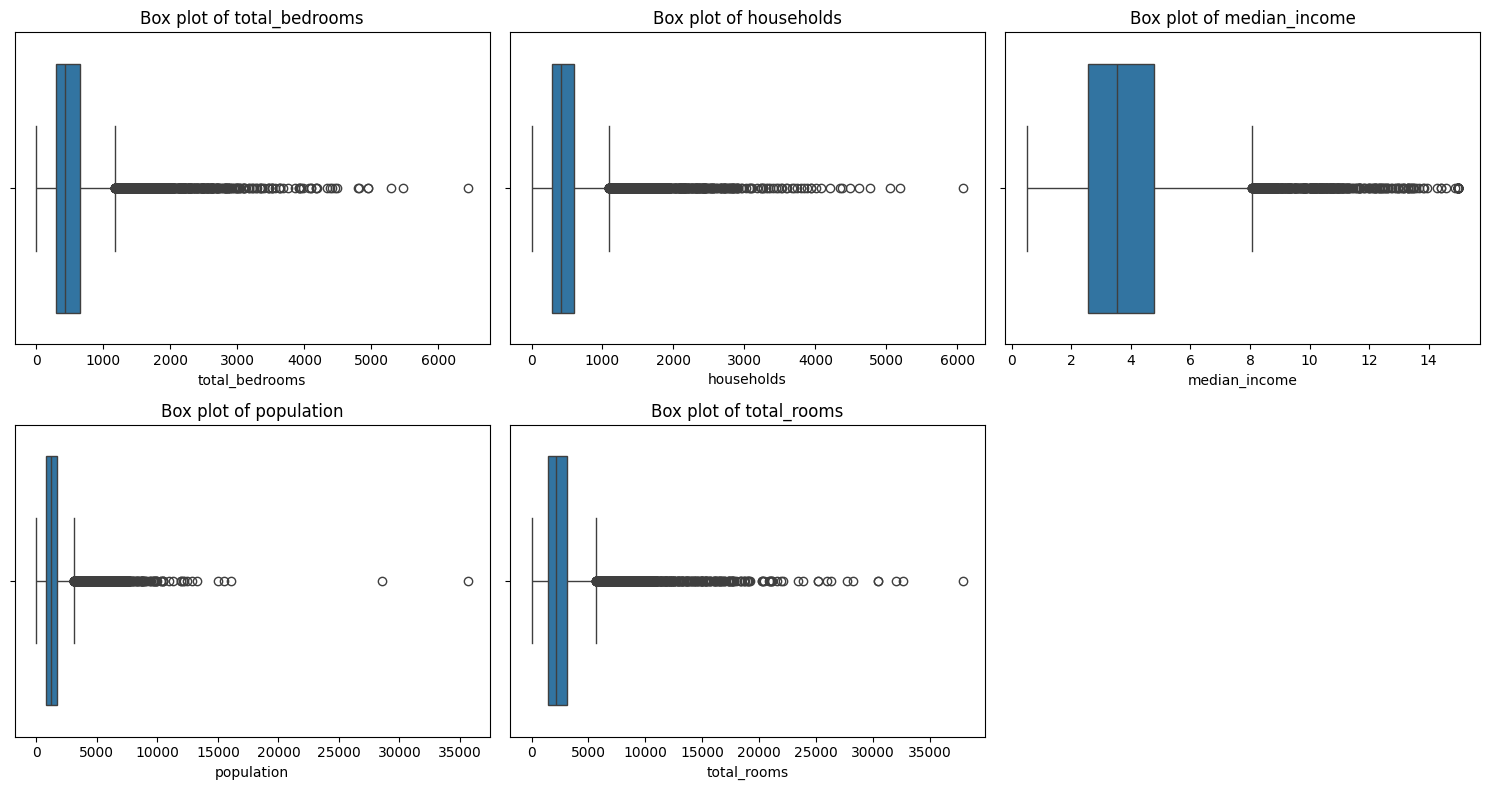

In [16]:
# columns with potential outliers

columns_outliers = {
  "total_rooms",
  "total_bedrooms",
  "population",
  "households",
  "median_income",
}

plt.figure(figsize=(15,8))
for i, column in enumerate(columns_outliers):
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=training_df[column])
  plt.title(f"Box plot of {column}")

plt.tight_layout()
plt.show()



In [18]:
def find_outliers_iqr(df, column):
    """Finds outliers in a column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Find outliers for each column
outliers = {}
for column in columns_outliers:
    outliers[column] = find_outliers_iqr(training_df, column)
    print(f"Number of outliers in {column}: {len(outliers[column])}")

Number of outliers in total_bedrooms: 1074
Number of outliers in households: 1032
Number of outliers in median_income: 563
Number of outliers in population: 1015
Number of outliers in total_rooms: 1076
